In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
X, y = mnist["data"], mnist["target"]
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [4]:
print(X_train.shape)

(60000, 784)


In [5]:
import numpy as np

In [6]:
X_train_as_shape = X_train.reshape(60000,28,28)

In [9]:
import matplotlib.pyplot as plt

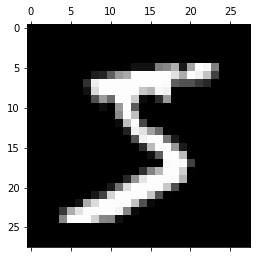

In [10]:
plt.matshow(X_train_as_shape[0], cmap=plt.cm.gray)

In [13]:
X_train_as_shape_big = X_train_as_shape.copy()

In [16]:
from scipy.ndimage.interpolation import shift

In [17]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))  # change it in function
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1]) # and reshape it back to 2d!

In [18]:
X_train_augmented = [image for image in X_train]  # create another list using map!
y_train_augmented = [label for label in y_train]


In [26]:
print(type(X_train_augmented))

<class 'numpy.ndarray'>


In [20]:

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):  # !! put it in a tuple like this!! -> does not have to reproduce!
    for image, label in zip(X_train, y_train): #!!! use zip!!
        X_train_augmented.append(shift_image(image, dx, dy)) # does append use copy of the list? it uses r-value -> could!
        y_train_augmented.append(label) # if r-value -> does copy! no real memory!


In [27]:
print(len(X_train_augmented))
print(type(X_train_augmented))

300000
<class 'numpy.ndarray'>


In [29]:
#X_train_augmented =np.array( X_train_augmented) # turn a simple list into np array!
#y_train_augmented =np.array( y_train_augmented) # turn a simple list into np array! -> necessary?
print(type(X_train_augmented))

<class 'numpy.ndarray'>


In [30]:
# need to shuffle the list first!
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=6)

knn_clf.fit(X_train_augmented, y_train_augmented)


KNeighborsClassifier(n_neighbors=6, weights='distance')

In [32]:
from sklearn.metrics import accuracy_score
y_pred = knn_clf.predict(X_test)

In [34]:
print(accuracy_score(y_test, y_pred))

0.9772
